#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 10
**CH10B Finding a good deal among hotels with multiple regression**

using the hotels-vienna dataset

version 1.0 2021-05-05

In [ ]:
import os
from pathlib import Path
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")


In [44]:
hotels = pd.read_csv(os.path.join("/workspaces/codespaces-jupyter/data/hotels-europe_features.csv"))
price = pd.read_csv(os.path.join("/workspaces/codespaces-jupyter/data/hotels-europe_price.csv"))
hotels = hotels.merge(price, on="hotel_id", how="left")

In [45]:
hotels["accommodation_type"].value_counts()

accommodation_type
Hotel                  100722
Apartment               16992
Guest House              9927
Bed and breakfast        6316
Hostel                   6226
Apart-hotel              3672
Vacation home Condo      1536
Pension                  1084
Inn                      1010
Country House              89
Palace                     67
Villa                      64
Caravan Park               60
Resort                     60
House boat                 31
Pousada                    28
Motel                      25
Cabin / Lodge              14
Cottage                    12
Chalet                     11
All inclusive               5
Castle                      5
Name: count, dtype: int64

In [46]:
hotels.columns

Index(['hotel_id', 'city', 'distance', 'stars', 'rating', 'country',
       'city_actual', 'rating_reviewcount', 'center1label', 'center2label',
       'neighbourhood', 'ratingta', 'ratingta_count', 'distance_alter',
       'accommodation_type', 'price', 'offer', 'offer_cat', 'year', 'month',
       'weekend', 'holiday', 'nnights', 'scarce_room'],
      dtype='object')

In [47]:
hotels = hotels.loc[
    lambda x: (x["accommodation_type"] == "Hotel")
    & (x["city_actual"] == "Rome")
    & (x["stars"] >= 3)
    & (x["stars"] <= 4)
    #& (x["price"] <= 600)
    & (x["stars"].notnull())
]

In [48]:
len(hotels)

4138

In [49]:
hotels["rating"].describe()

count    4112.000000
mean        3.884655
std         0.443725
min         2.500000
25%         3.700000
50%         3.900000
75%         4.100000
max         4.800000
Name: rating, dtype: float64

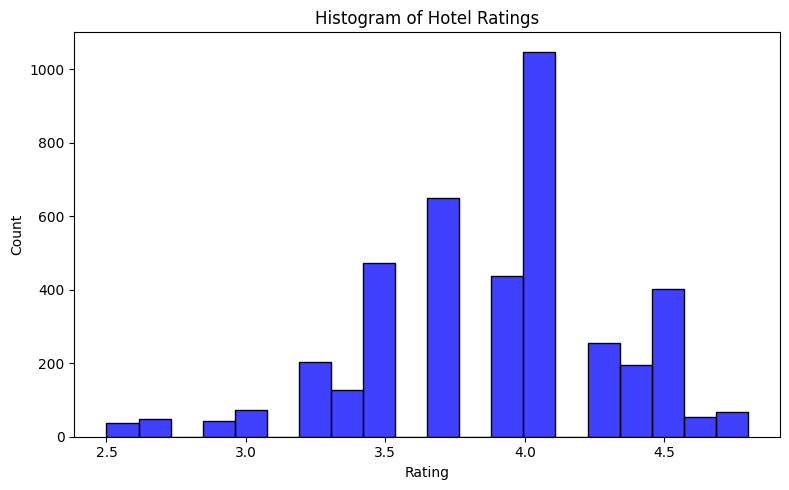

In [50]:
plt.figure(figsize=(8, 5))
sns.histplot(hotels["rating"], bins=20, color="blue", edgecolor="black")
plt.title("Histogram of Hotel Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [55]:
hotels.dropna(inplace=True)
hotels
hotels["rating"].describe()

count    4112.000000
mean        3.884655
std         0.443725
min         2.500000
25%         3.700000
50%         3.900000
75%         4.100000
max         4.800000
Name: rating, dtype: float64

In [60]:
hotels["high_rating"] = np.where(hotels["rating"] >= 4, 1, 0)
hotels["high_rating"].value_counts()

high_rating
0    2089
1    2023
Name: count, dtype: int64

In [63]:
hotels.head().T

,111312,111313,111314,111315,111316
hotel_id,15166,15166,15166,15166,15167
city,Rome,Rome,Rome,Rome,Rome
distance,3.2,3.2,3.2,3.2,3.2
stars,4.0,4.0,4.0,4.0,4.0
rating,3.5,3.5,3.5,3.5,3.5
country,Italy,Italy,Italy,Italy,Italy
city_actual,Rome,Rome,Rome,Rome,Rome
rating_reviewcount,19.0,19.0,19.0,19.0,19.0
center1label,City centre,City centre,City centre,City centre,City centre
center2label,Palazzo Madama,Palazzo Madama,Palazzo Madama,Palazzo Madama,Grotta del Bue Marino


### Linear Probability

In [ ]:
# does distance affect probablity of being high rated hotel?

lpm_hr1 = smf.ols("high_rating ~ distance", data=hotels).fit(cov_type="HC1")
lpm_hr1.summary(),

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:            high_rating   R-squared:                       0.030
 Model:                            OLS   Adj. R-squared:                  0.029
 Method:                 Least Squares   F-statistic:                     194.8
 Date:                Wed, 16 Jul 2025   Prob (F-statistic):           2.72e-43
 Time:                        18:18:10   Log-Likelihood:                -2922.2
 No. Observations:                4112   AIC:                             5848.
 Df Residuals:                    4110   BIC:                             5861.
 Df Model:                           1                                         
 Covariance Type:                  HC1                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ---------------------------------------------------------------------

In [69]:
# does stars affect probablity of being high rated hotel?

lpm_hr2 = smf.ols("high_rating ~ stars", data=hotels).fit(cov_type="HC1")
lpm_hr2.summary(),

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:            high_rating   R-squared:                       0.019
 Model:                            OLS   Adj. R-squared:                  0.019
 Method:                 Least Squares   F-statistic:                     81.02
 Date:                Wed, 16 Jul 2025   Prob (F-statistic):           3.34e-19
 Time:                        18:19:29   Log-Likelihood:                -2943.8
 No. Observations:                4112   AIC:                             5892.
 Df Residuals:                    4110   BIC:                             5904.
 Df Model:                           1                                         
 Covariance Type:                  HC1                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ---------------------------------------------------------------------

In [70]:
# does price affect probablity of being high rated hotel?

lpm_hr3 = smf.ols("high_rating ~ price", data=hotels).fit(cov_type="HC1")
lpm_hr3.summary(),

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:            high_rating   R-squared:                       0.038
 Model:                            OLS   Adj. R-squared:                  0.038
 Method:                 Least Squares   F-statistic:                     195.6
 Date:                Wed, 16 Jul 2025   Prob (F-statistic):           1.91e-43
 Time:                        18:20:15   Log-Likelihood:                -2903.8
 No. Observations:                4112   AIC:                             5812.
 Df Residuals:                    4110   BIC:                             5824.
 Df Model:                           1                                         
 Covariance Type:                  HC1                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ---------------------------------------------------------------------

In [73]:
# commine all

lpm_hr4 = smf.ols("high_rating ~ distance + price + stars", data=hotels).fit(cov_type="HC1")
lpm_hr4.summary(),

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:            high_rating   R-squared:                       0.071
 Model:                            OLS   Adj. R-squared:                  0.070
 Method:                 Least Squares   F-statistic:                     144.3
 Date:                Wed, 16 Jul 2025   Prob (F-statistic):           6.35e-89
 Time:                        18:21:17   Log-Likelihood:                -2832.3
 No. Observations:                4112   AIC:                             5673.
 Df Residuals:                    4108   BIC:                             5698.
 Df Model:                           3                                         
 Covariance Type:                  HC1                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ---------------------------------------------------------------------

### Logit Model

In [75]:
# creating matrixes for regressions

y1, X1 = dmatrices("high_rating ~ distance",hotels)
y2, X2 = dmatrices("high_rating ~ price",hotels)
y3, X3 = dmatrices("high_rating ~ stars",hotels)
y4, X4 = dmatrices("high_rating ~ distance + price + rating",hotels)

In [ ]:
# GLM logit
logit1 = sm.GLM(y1, X1, family=sm.families.Binomial(link=sm.genmod.families.links.logit()))
logit1 = logit.fit()


logit2 = sm.GLM(y2, X2, family=sm.families.Binomial(link=sm.genmod.families.links.logit()))
logit2 = logit2.fit()


logit3 = sm.GLM(y3, X3, family=sm.families.Binomial(link=sm.genmod.families.links.logit()))
logit3 = logit3.fit()


logit4 = sm.GLM(y4, X4, family=sm.families.Binomial(link=sm.genmod.families.links.logit()))
logit4 = logit4.fit()


In [82]:
from sklearn.metrics import brier_score_loss

# Get predicted probabilities for each model
probs1 = logit1.predict(X1)
probs2 = logit2.predict(X2)
probs3 = logit3.predict(X3)
probs4 = logit4.predict(X4)

# True labels
y_true = y1.ravel()

# Calculate Brier scores
brier1 = brier_score_loss(y_true, probs1)
brier2 = brier_score_loss(y_true, probs2)
brier3 = brier_score_loss(y_true, probs3)
brier4 = brier_score_loss(y_true, probs4)

brier1, brier2, brier3, brier4

(np.float64(0.24252460191159034),
 np.float64(0.23943876472078562),
 np.float64(0.24510257698808405),
 np.float64(1.0431723178816166e-24))

In [84]:
logit2.summary(),

(<class 'statsmodels.iolib.summary.Summary'>
 """
                  Generalized Linear Model Regression Results                  
 Dep. Variable:            high_rating   No. Observations:                 4112
 Model:                            GLM   Df Residuals:                     4110
 Model Family:                Binomial   Df Model:                            1
 Link Function:                  logit   Scale:                          1.0000
 Method:                          IRLS   Log-Likelihood:                -2762.7
 Date:                Wed, 16 Jul 2025   Deviance:                       5525.5
 Time:                        18:30:51   Pearson chi2:                 4.14e+03
 No. Iterations:                     4   Pseudo R-squ. (CS):            0.04141
 Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ---------------------------------------------------------------------

### Probit Model

In [85]:
# GLM logit
probit1 = sm.GLM(y1, X1, family=sm.families.Binomial(link=sm.genmod.families.links.probit()))
probit1 = probit1.fit()


probit2 = sm.GLM(y2, X2, family=sm.families.Binomial(link=sm.genmod.families.links.probit()))
probit2 = probit2.fit()


probit3 = sm.GLM(y3, X3, family=sm.families.Binomial(link=sm.genmod.families.links.probit()))
probit3 = probit3.fit()


probit4 = sm.GLM(y4, X4, family=sm.families.Binomial(link=sm.genmod.families.links.probit()))
probit4 = probit4.fit()

In [86]:
probit1.summary(),

(<class 'statsmodels.iolib.summary.Summary'>
 """
                  Generalized Linear Model Regression Results                  
 Dep. Variable:            high_rating   No. Observations:                 4112
 Model:                            GLM   Df Residuals:                     4110
 Model Family:                Binomial   Df Model:                            1
 Link Function:                 probit   Scale:                          1.0000
 Method:                          IRLS   Log-Likelihood:                -2783.7
 Date:                Wed, 16 Jul 2025   Deviance:                       5567.5
 Time:                        18:42:49   Pearson chi2:                 4.10e+03
 No. Iterations:                     4   Pseudo R-squ. (CS):            0.03158
 Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ---------------------------------------------------------------------

In [88]:
probit2.summary(),

(<class 'statsmodels.iolib.summary.Summary'>
 """
                  Generalized Linear Model Regression Results                  
 Dep. Variable:            high_rating   No. Observations:                 4112
 Model:                            GLM   Df Residuals:                     4110
 Model Family:                Binomial   Df Model:                            1
 Link Function:                 probit   Scale:                          1.0000
 Method:                          IRLS   Log-Likelihood:                -2764.0
 Date:                Wed, 16 Jul 2025   Deviance:                       5528.0
 Time:                        18:43:27   Pearson chi2:                 4.14e+03
 No. Iterations:                     4   Pseudo R-squ. (CS):            0.04082
 Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ---------------------------------------------------------------------

In [89]:
probit3.summary(),

(<class 'statsmodels.iolib.summary.Summary'>
 """
                  Generalized Linear Model Regression Results                  
 Dep. Variable:            high_rating   No. Observations:                 4112
 Model:                            GLM   Df Residuals:                     4110
 Model Family:                Binomial   Df Model:                            1
 Link Function:                 probit   Scale:                          1.0000
 Method:                          IRLS   Log-Likelihood:                -2809.8
 Date:                Wed, 16 Jul 2025   Deviance:                       5619.6
 Time:                        18:43:37   Pearson chi2:                 4.11e+03
 No. Iterations:                     4   Pseudo R-squ. (CS):            0.01921
 Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ---------------------------------------------------------------------

In [91]:
probit4.summary(),

(<class 'statsmodels.iolib.summary.Summary'>
 """
                  Generalized Linear Model Regression Results                  
 Dep. Variable:            high_rating   No. Observations:                 4112
 Model:                            GLM   Df Residuals:                     4108
 Model Family:                Binomial   Df Model:                            3
 Link Function:                 probit   Scale:                          1.0000
 Method:                          IRLS   Log-Likelihood:                    nan
 Date:                Wed, 16 Jul 2025   Deviance:                   3.2870e-09
 Time:                        18:43:51   Pearson chi2:                 1.64e-09
 No. Iterations:                    30   Pseudo R-squ. (CS):                nan
 Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ---------------------------------------------------------------------

In [72]:
reg0 = smf.ols("lnprice ~ rating", data=hotels).fit()
reg1 = smf.ols("lnprice ~ distance", data=hotels).fit()
reg2 = smf.ols("lnprice ~ distance + rating", data=hotels).fit()

PatsyError: Error evaluating factor: NameError: name 'lnprice' is not defined
    lnprice ~ rating
    ^^^^^^^

In [9]:
Stargazer([reg0,reg1,reg2])

In [10]:
import pandas as pd
import statsmodels.formula.api as smf

# Define knots
knot1 = 1
knot2 = 4

# Create piecewise linear spline variables
hotels["dspline_0"] = hotels["distance"]
hotels["dspline_1"] = (hotels["distance"] - knot1).clip(lower=0)
hotels["dspline_2"] = (hotels["distance"] - knot2).clip(lower=0)

# Run regression with robust (HC1) standard errors
#model = smf.ols("lnprice ~ lspline_0 + lspline_1 + lspline_2", data=hotels).fit(cov_type="HC1")

# Display the results
#print(model.summary())


In [11]:
# Define knot
knot = 3.5

# Create piecewise linear spline variables for rating
hotels["rspline_0"] = hotels["rating"]
hotels["rspline_1"] = (hotels["rating"] - knot).clip(lower=0)
hotels

# Run regression with robust standard errors
#model_rating = smf.ols("lnprice ~ rspline_0 + rspline_1", data=hotels).fit(cov_type="HC1")

# Display the results
#print(model_rating.summary())

,country,city_actual,rating_count,center1label,center2label,neighbourhood,price,city,stars,ratingta,...,lnprice,distance2,lndistance,star35,star4,dspline_0,dspline_1,dspline_2,rspline_0,rspline_1
1,Austria,Vienna,189.0,City centre,Donauturm,17. Hernals,81,Vienna,4.0,3.5,...,4.394449,1.7,0.530628,False,True,1.7,0.7,0.0,3.9,0.4
2,Austria,Vienna,53.0,City centre,Donauturm,Alsergrund,85,Vienna,4.0,3.5,...,4.442651,1.4,0.336472,False,True,1.4,0.4,0.0,3.7,0.2
3,Austria,Vienna,55.0,City centre,Donauturm,Alsergrund,83,Vienna,3.0,4.0,...,4.418841,1.7,0.530628,False,False,1.7,0.7,0.0,4.0,0.5
4,Austria,Vienna,33.0,City centre,Donauturm,Alsergrund,82,Vienna,4.0,3.5,...,4.406719,1.2,0.182322,False,True,1.2,0.2,0.0,3.9,0.4
6,Austria,Vienna,57.0,City centre,Donauturm,Alsergrund,103,Vienna,4.0,3.5,...,4.634729,0.9,-0.105361,False,True,0.9,0.0,0.0,3.9,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,Austria,Vienna,77.0,City centre,Donauturm,Wieden,100,Vienna,3.0,4.0,...,4.605170,1.2,0.182322,False,False,1.2,0.2,0.0,4.0,0.5
421,Austria,Vienna,572.0,City centre,Donauturm,Wieden,95,Vienna,4.0,4.0,...,4.553877,1.5,0.405465,False,True,1.5,0.5,0.0,4.1,0.6
422,Austria,Vienna,53.0,City centre,Donauturm,Wieden,73,Vienna,3.0,3.0,...,4.290459,1.5,0.405465,False,False,1.5,0.5,0.0,3.4,0.0
425,Austria,Vienna,112.0,City centre,Donauturm,Wieden,100,Vienna,4.0,4.5,...,4.605170,1.0,0.000000,False,True,1.0,0.0,0.0,4.4,0.9


In [12]:
from patsy import dmatrices
import statsmodels.api as sm

# Create the design matrices using the manually created spline variables
y, X = dmatrices(
    "lnprice ~ dspline_0 + dspline_1 + dspline_2 + rspline_0 + rspline_1 + star35 + star4",
    data=hotels
)

# Run the OLS regression
reg3 = sm.OLS(y, X).fit()

# Show the summary
print(reg3.summary())


                            OLS Regression Results                            
Dep. Variable:                lnprice   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     34.76
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           2.19e-31
Time:                        21:30:43   Log-Likelihood:                 14.744
No. Observations:                 207   AIC:                            -13.49
Df Residuals:                     199   BIC:                             13.17
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.1551      0.454     11.

In [13]:
hotels["lnprice_hat"] = reg3.predict(X)

hotels["lnprice_resid"] = hotels["lnprice"] - hotels["lnprice_hat"]

hotels["bestdeals"] = hotels.index.isin(
    hotels["lnprice_resid"].sort_values(ascending=False).tail().index.values
)

In [14]:
# Create the design matrices using the manually created spline variables
y2, X2 = dmatrices(
    "lnprice ~ dspline_0 + dspline_1 + dspline_2",
    data=hotels
)

# Run the OLS regression
reg4 = sm.OLS(y2, X2).fit()

# Show the summary
print(reg4.summary())


                            OLS Regression Results                            
Dep. Variable:                lnprice   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     39.97
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           2.43e-20
Time:                        21:30:43   Log-Likelihood:                -19.879
No. Observations:                 207   AIC:                             47.76
Df Residuals:                     203   BIC:                             61.09
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1806      0.060     86.674      0.0

In [15]:
#refit reg3 for Stargazer

reg3 = smf.ols(
     "lnprice ~ dspline_0 + dspline_1 + dspline_2 + rspline_0 + rspline_1 + star35 + star4",
    data=hotels,
).fit()

In [16]:
# Refit reg4 using smf.ols to ensure compatibility with Stargazer
reg4 = smf.ols(
	"lnprice ~ dspline_0 + dspline_1 + dspline_2",
	data=hotels,
).fit()

Stargazer([reg1, reg2, reg3, reg4])

### Figure 10.3 ˆy−y plot for log hotel price

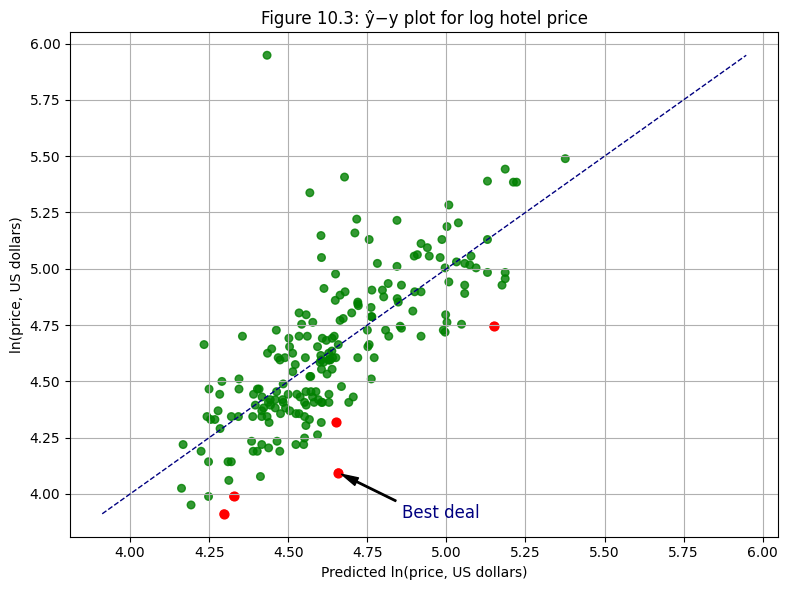

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    hotels["lnprice_hat"], hotels["lnprice"],
    c=hotels["bestdeals"].map({False: "green", True: "red"}),
    s=30, alpha=0.8, label=None
)

# Highlight best deals with a different marker and color
bestdeals = hotels[hotels["bestdeals"]]
plt.scatter(
    bestdeals["lnprice_hat"], bestdeals["lnprice"],
    c="red", s=40, marker="o", label="Best deal"
)

# 45-degree reference line
lims = [
    min(hotels["lnprice_hat"].min(), hotels["lnprice"].min()),
    max(hotels["lnprice_hat"].max(), hotels["lnprice"].max())
]
plt.plot(lims, lims, 'k--', color="navy", linewidth=1, label="45-degree line")

# Annotate "Best deal"
if not bestdeals.empty:
    bd = bestdeals.iloc[0]
    plt.annotate(
        "Best deal",
        xy=(bd["lnprice_hat"], bd["lnprice"]),
        xytext=(bd["lnprice_hat"]+0.2, bd["lnprice"]-0.2),
        arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6),
        fontsize=12,
        color="navy"
    )

plt.xlabel("Predicted ln(price, US dollars)")
plt.ylabel("ln(price, US dollars)")
plt.title("Figure 10.3: ŷ−y plot for log hotel price")
plt.grid(True)
plt.tight_layout()
plt.show()

### Residual plot - not in the book

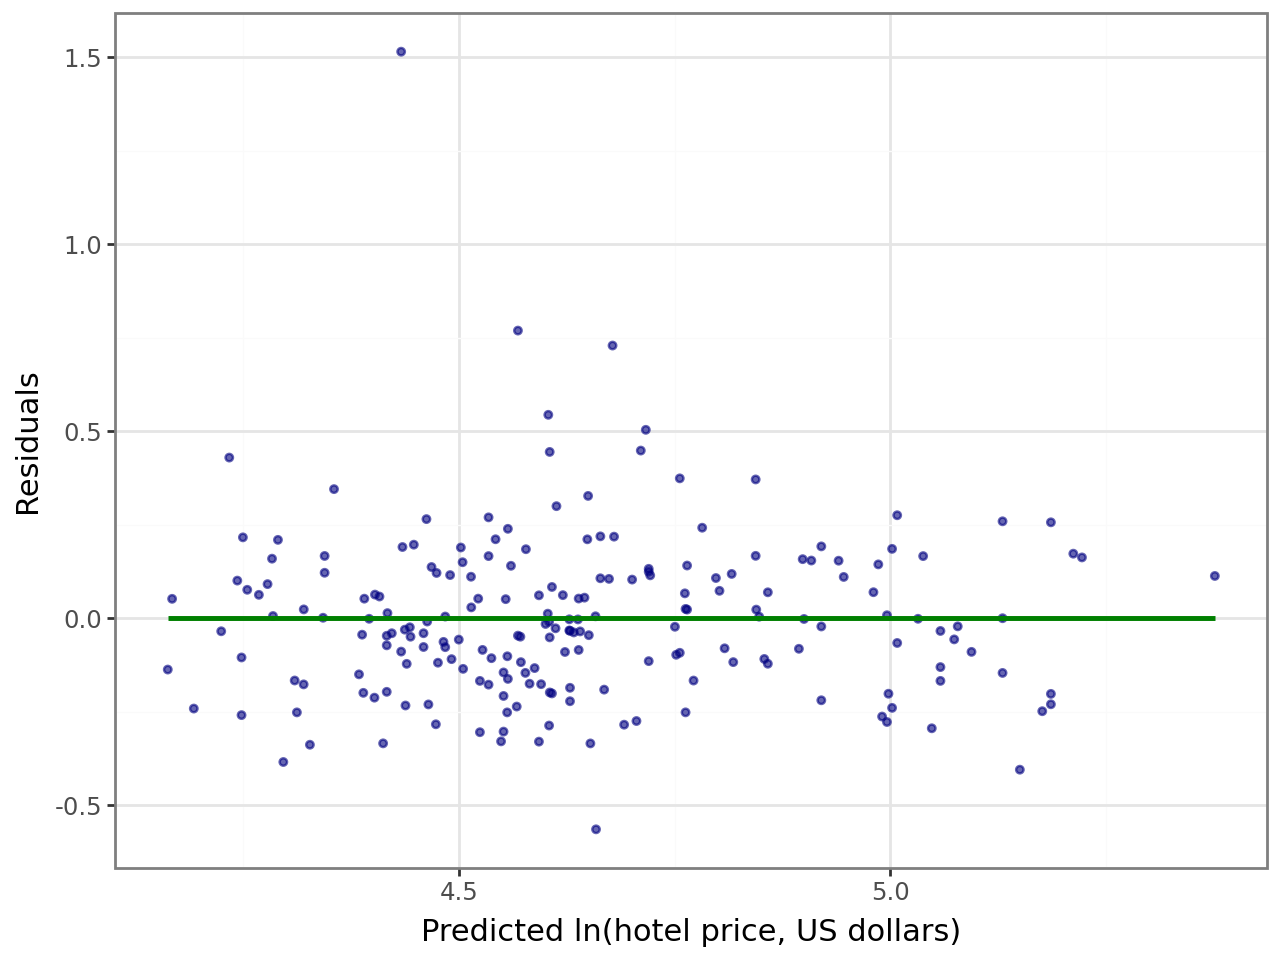

In [18]:
y_hat_resid_hotels = (
    ggplot(data=hotels)
    + geom_point(
        aes(x="lnprice_hat", y="lnprice_resid"),
        color="navy",
        size=1,
        fill="navy",
        alpha=0.6,
    )
    + geom_smooth(
        aes(x="lnprice_hat", y="lnprice_resid"),
        method="lm",
        color="green",
        size=1,
        se=False,
    )
    + labs(x="Predicted ln(hotel price, US dollars)", y="Residuals")
    + scale_colour_manual(name="", values=["green", "black"])
    + theme_bw()
)
y_hat_resid_hotels